# DCCNN - LeNet

https://www.packtpub.com/mapt/book/all_books/9781787128422/3/ch03lvl1sec25/an-example-of-dcnn--lenet

In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

In [3]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
metrics=["accuracy"])
history = model.fit(X_train, y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])
# list all data in history
print(history.history.keys())

60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 681s - loss: 0.1818 - acc: 0.9442 - val_loss: 0.0621 - val_acc: 0.9823
Epoch 2/20
48000/48000 [==============================] - 903s - loss: 0.0493 - acc: 0.9844 - val_loss: 0.0446 - val_acc: 0.9868
Epoch 3/20
48000/48000 [==============================] - 1105s - loss: 0.0332 - acc: 0.9894 - val_loss: 0.0416 - val_acc: 0.9872
Epoch 4/20
48000/48000 [==============================] - 1505s - loss: 0.0243 - acc: 0.9921 - val_loss: 0.0452 - val_acc: 0.9874
Epoch 5/20
48000/48000 [==============================] - 1144s - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0356 - val_acc: 0.9894
Epoch 6/20
48000/48000 [==============================] - 974s - loss: 0.0144 - acc: 0.9952 - val_loss: 0.0479 - val_acc: 0.9883
Epoch 7/20
48000/48000 [==============================] - 1239s - loss: 0.0116 - acc: 0.9960 - val_loss: 0.0377 - val_acc: 0.9902
Epoc

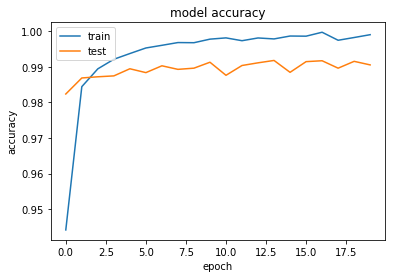

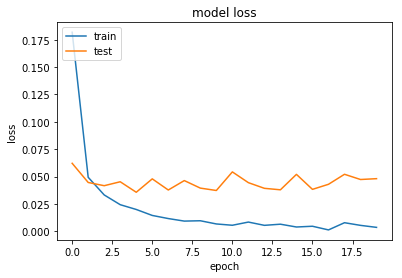

In [4]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()